In [1]:
import pickle
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt
%matplotlib inline

import flayer
import particle_evolution
import feo_thermodynamics as feot
import multiprocessing
import bulk_case_runner

# We have some annoying warnings - I think from llvm bug - fix then remove this
import warnings
warnings.filterwarnings("ignore")

In [2]:
base_parameters = {'f_layer_thickness': 200.0E3,
                    'delta_t_icb': 10.0,
                    'xfe_outer_core': 0.92,
                    'xfe_icb': 0.92,
                    'growth_prefactor': 150.0,
                    'chemical_diffusivity': 1.0E-9,
                    'kinematic_viscosity': 1.0E-6,
                    'i0': 1.0E-10,
                    'surf_energy': 1.08E-2, 
                    'number_of_analysis_points': 200,
                    'r_icb': 1221.5E3, 
                    'r_cmb': 3480.0E3,
                    'gruneisen_parameter': 1.5}

In [3]:
!mkdir cases/grid

In [4]:
# Bunch of cases, four at a time

cases = []

for dl in np.linspace(1.0E-7, 5.0E-10, 10):
    for i0 in np.linspace(5.0E-10, 1.0E-12, 10):
        name = f"cases/grid/{dl:.3e}_dl_{i0:.3e}_i0"
        input_parameters = dict(base_parameters)
        input_parameters["chemical_diffusivity"] = dl
        input_parameters["i0"] = i0
        cases.append((name, input_parameters))
        
with multiprocessing.Pool(processes=6) as pool:
    pool.map(bulk_case_runner.case_handler, cases)

cases/grid/8.894e-08_dl_2.228e-10_i0 failed! Exception was f(a) and f(b) must have different signs
cases/grid/8.894e-08_dl_1.673e-10_i0 failed! Exception was f(a) and f(b) must have different signs
cases/grid/8.894e-08_dl_1.119e-10_i0: growth rate 19113.170867578647 km/Myrm ax vf_ratio 0.038130628834768344
cases/grid/8.894e-08_dl_5.644e-11_i0: growth rate 15077.182729850208 km/Myrm ax vf_ratio 0.028037202714619007
cases/grid/8.894e-08_dl_1.000e-12_i0: growth rate 375.29832240332246 km/Myrm ax vf_ratio 0.00036654361594261407
cases/grid/5.578e-08_dl_5.000e-10_i0: growth rate 6163.210997776765 km/Myrm ax vf_ratio 0.03725688159886435
cases/grid/5.578e-08_dl_4.446e-10_i0 failed! Exception was f(a) and f(b) must have different signs
cases/grid/5.578e-08_dl_3.891e-10_i0 failed! Exception was f(a) and f(b) must have different signs
cases/grid/5.578e-08_dl_3.337e-10_i0: growth rate 14214.334392914654 km/Myrm ax vf_ratio 0.03783319162487155
cases/grid/5.578e-08_dl_2.782e-10_i0 failed! Exception 

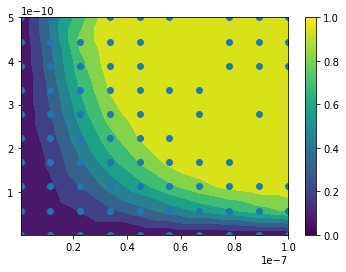

In [5]:
import glob

files = glob.glob("cases/grid/*.pickle")
files.sort()

dl = []
i0 = []
vf = []
g = []

for file in files:
    data_from_file = bulk_case_runner.load_case_data(file)
    #print(f"{file} growth rate {data_from_file['growth_rate']} km/Myr max vf_ratio {data_from_file['vf_ratio'].max()}")
    g.append(data_from_file['growth_rate'])
    vf.append(data_from_file['vf_ratio'].max())
    i0.append(data_from_file['i0'])
    dl.append(data_from_file['chemical_diffusivity'])
    
plt.tricontourf(dl, i0, vf)
plt.scatter(dl, i0)
plt.colorbar()

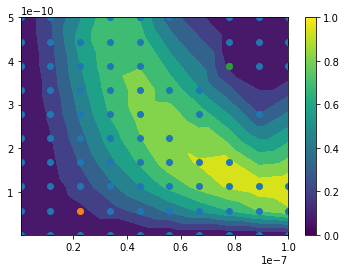

In [19]:
plt.tricontourf(dl, i0, g)
plt.scatter(dl, i0)
plt.colorbar()
plt.scatter(2.261e-08, 5.644e-11)
plt.scatter(7.789e-08, 3.891e-10)

growth rate 1934.2218169894984 km/Myr max vf_ratio 0.005245711997017993
Particle radii between 0.162 and 1.98e-05 m


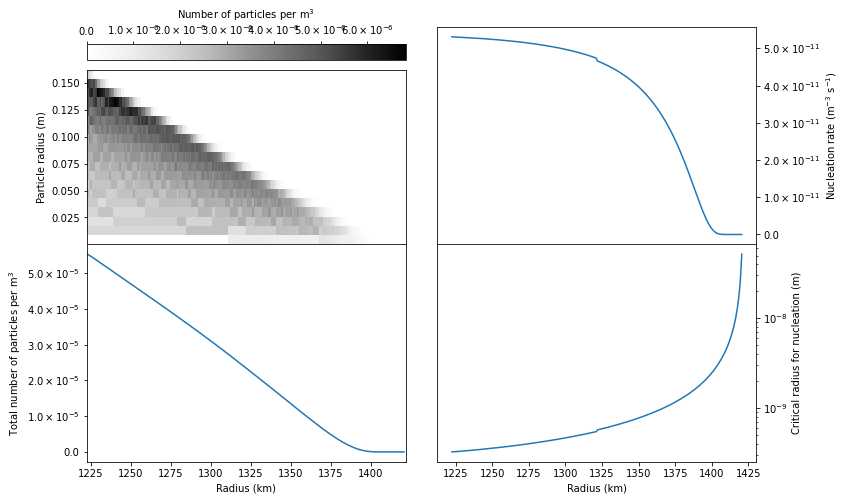

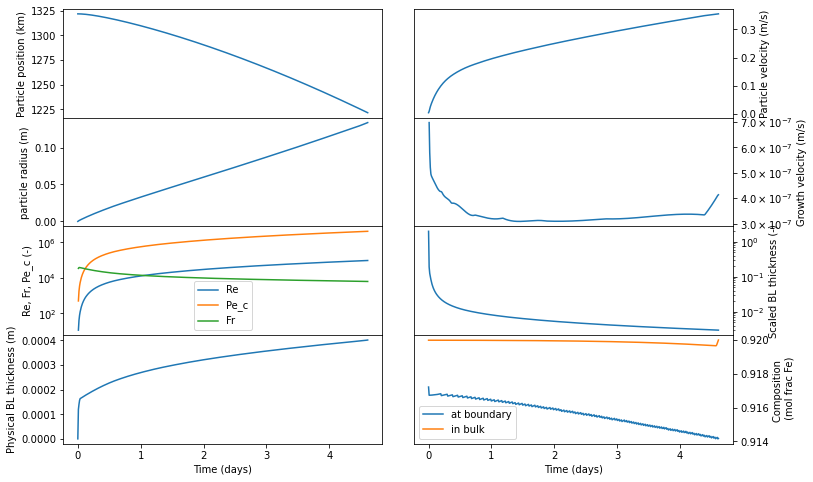

In [21]:
results = bulk_case_runner.load_case_data('cases/grid/2.261e-08_dl_5.644e-11_i0.pickle')
print(f"growth rate {results['growth_rate']} km/Myr max vf_ratio {results['vf_ratio'].max()}")
bulk_case_runner.plot_case_csd_nuc(**results)
bulk_case_runner.plot_case_single_solution(100, results)


growth rate 1682.8498589565204 km/Myr max vf_ratio 0.036900336552815424
Particle radii between 0.205 and 2.57e-05 m


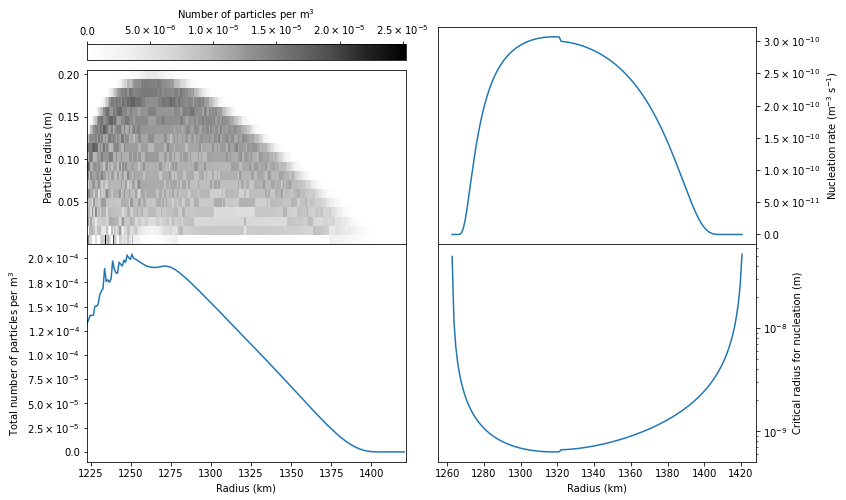

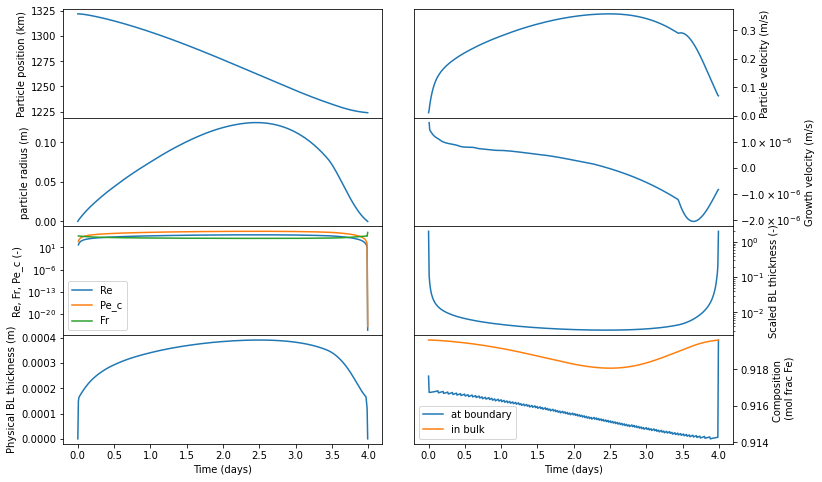

In [22]:
results = bulk_case_runner.load_case_data('cases/grid/7.789e-08_dl_3.891e-10_i0.pickle')
print(f"growth rate {results['growth_rate']} km/Myr max vf_ratio {results['vf_ratio'].max()}")
bulk_case_runner.plot_case_csd_nuc(**results)
bulk_case_runner.plot_case_single_solution(100, results)